# CE9010: Introduction to Data Science Group 15
## Semester 2 2017/18
## Teo Jun Yean
<hr>

## 1: Data Problem to Solve: [The Titanic Challenge](https://www.kaggle.com/c/titanic)

The Titanic challenge hosted by Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat.

The best score I have achieved is an accuracy score of 0.78947 on the public leaderboard. As I'm writing this submission, I am ranked among the top 30% of all Kagglers.

Throughout this jupyter notebook, I will be using Python at each level of the pipeline.

The use of () indicates where I could have improved on for better prediction.

The main libraries involved in this tutorial are:

    Pandas for data manipulation and ingestion
    Matplotlib and seaborn for data visualization
    Numpy for multidimensional array computing
    sklearn for machine learning and predictive modeling


## Objectives
### $\bullet$ Data Acquisition with Kaggle API
### $\bullet$ Data Exploration with Seaborn
### $\bullet$ Data Pre-Processing with Pandas
### $\bullet$ Data Analysis with Classification Algorithms: 1) Logistic Regression, 2) Random Forests and 3) NNs
### $\bullet$ Analysis of Results
<hr>

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

# Data viz
import seaborn as sns

# Data Library
import pandas as pd
pd.options.display.max_columns = 100


## 1. Data Acquisition with Kaggle API
<hr>
The data-set contains 3 files: a training file, a test file and an example of how the submission should look like. These files were extracted through the Kaggle API, following the instructions from its [Official API Page](https://github.com/Kaggle/kaggle-api). 

The image below shows the successful data acquisition through CLI (my first time!) 

![alt text](img/DataCollection.png)

## 1.1 Load dataset

Let us load the training data with Pandas <br>

In [2]:
# import data with numpy
data = pd.read_csv('data/train.csv')

# number of training data
n = data.shape[0] #YOUR CODE HERE
print('Number of training data and features=',data.shape)
print('Data Features are: ', data.columns.values)

Number of training data and features= (891, 12)
Data Features are:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## 2. Data Exploration

Pandas allow us to visualise the first elements of the data

In [3]:
data.head() #Experiment with CSS to make tables nicer in the future

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The 'Survived' column is the target y-value we are supposed to predict, either a 0 if he dies or 1 if he survives.

The other features are:

    PassengerId: A unique id given to each traveller on the Titanic. 
    Pclass: The passenger class. It has three possible values: 1,2,3 (first, second and third class)
    Name: Name of Passenger
    Sex: Gender of Passenger (Male or Female)
    Age: Age of Passenger
    SibSp: Number of siblings and spouses travelling with the passenger
    Parch: Number of parents and children traveling with the passenger
    Ticket: The ticket number
    Fare: The ticket Fare
    Cabin: The cabin number
    Embarked: Three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

For more information on features in this competition, see https://www.kaggle.com/c/titanic/data

Already, by analysing the features, we can imply some correlations e.g. Pclass & Fare should be correlated. The next step is to visualise it more specifically.

## 2.1 Explore the dataset distribution with seaborn
<hr>
First, I explore the individual features distribution.



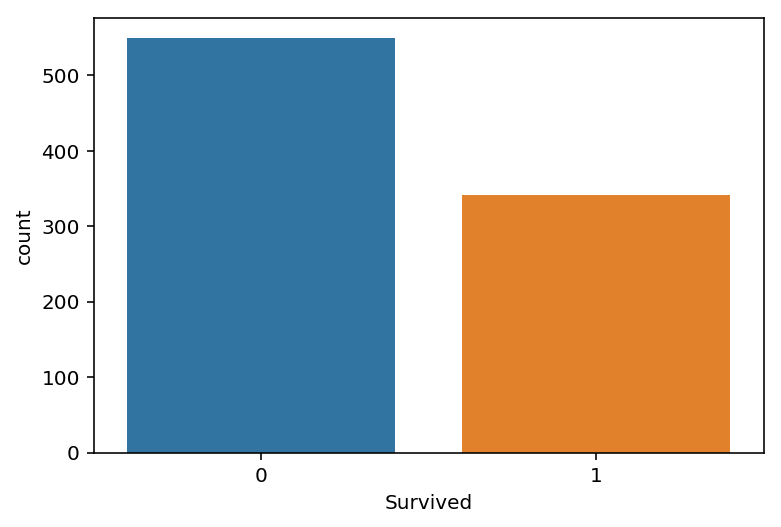

In [4]:
sns.countplot(x='Survived', data=data) #More non-survivors, but what are the implications?

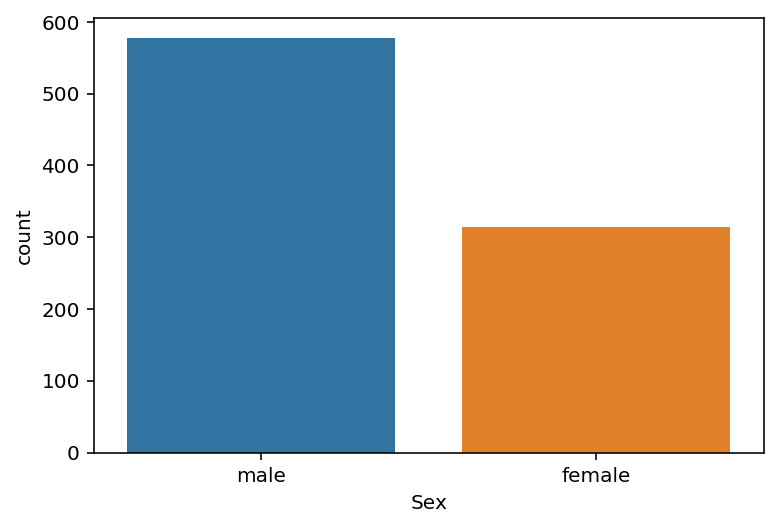

In [5]:
sns.countplot(x='Sex', data=data) # More males than females

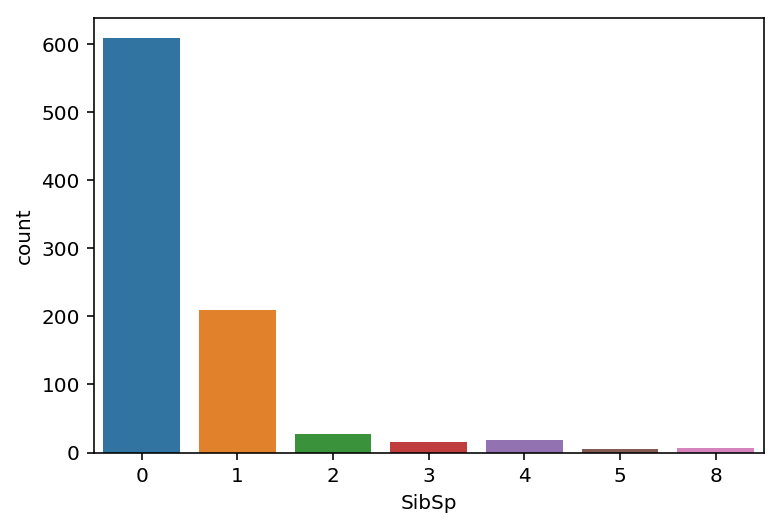

In [6]:
sns.countplot(x='SibSp', data=data) #Many solo travellers

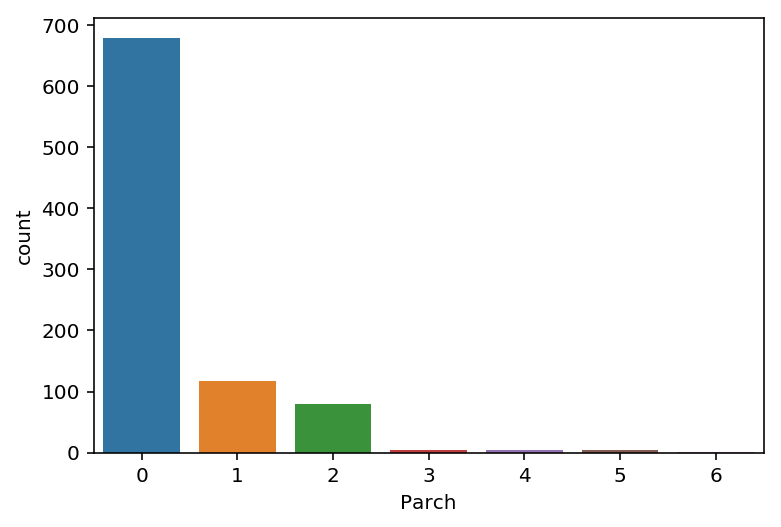

In [7]:
sns.countplot(x='Parch', data=data) #Many solo travellers

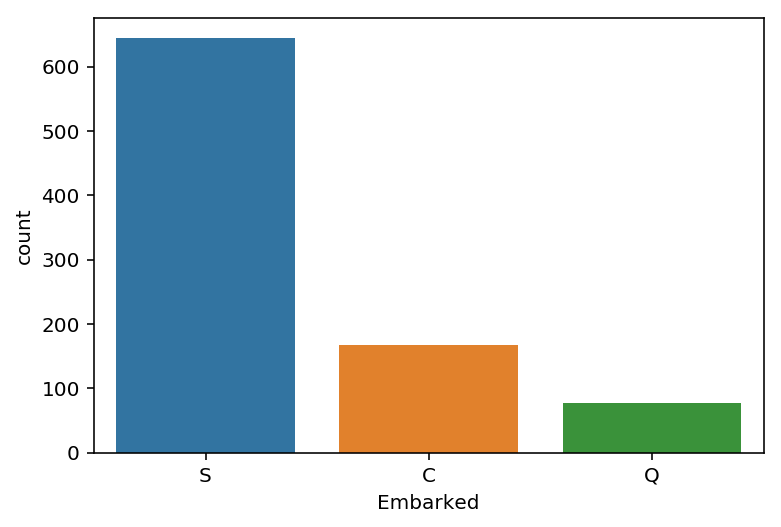

In [8]:
sns.countplot(x='Embarked', data=data) #Most of dataset are from S

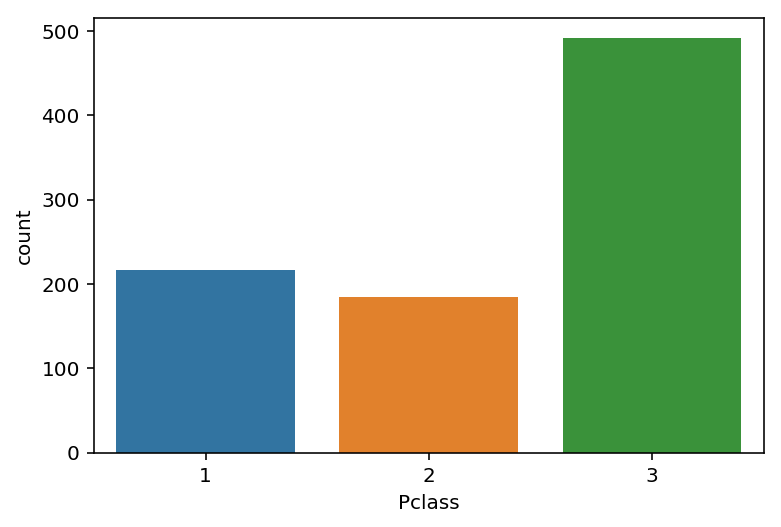

In [9]:
sns.countplot(x='Pclass', data=data) #Most of dataset are from S

Clearly, some features are skewed in the dataset, which could be a limitation for our model. Next, I explore correlations of the data features.<br>

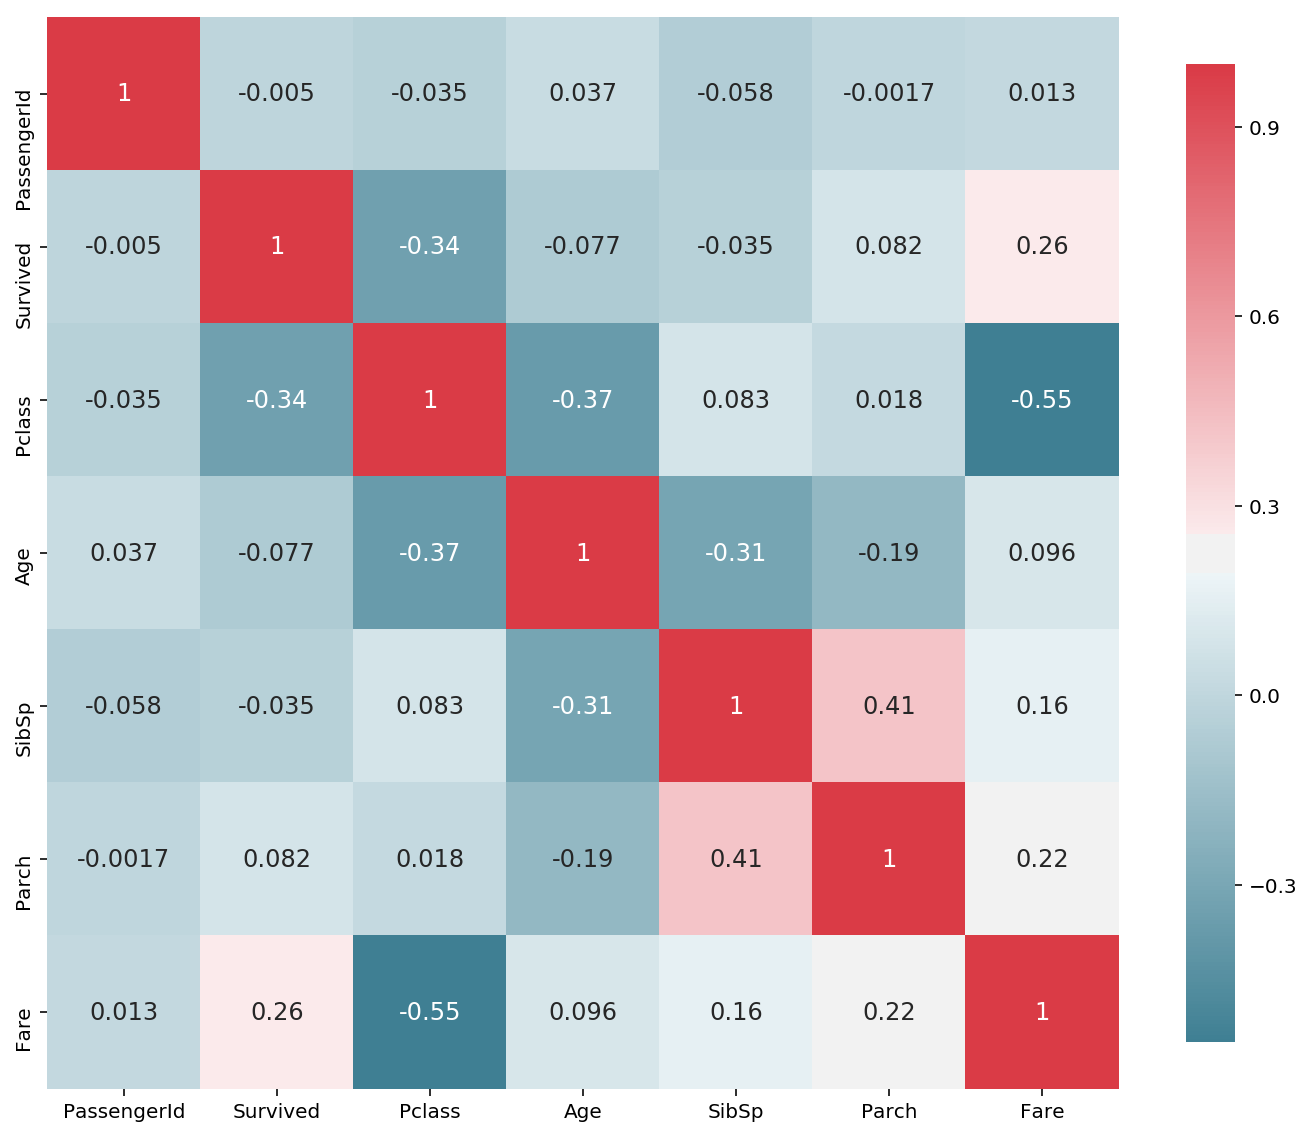

In [10]:
def plot_correlation_map( df ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
plot_correlation_map(data)

This heatmap gives us a basic idea of important numerical variables. Indeed, we find a few interesting correlations that are actualy quite intuitive. A value higher to 1 indicates higher correlation, while closer to 0 means less. 

In descending order: <br>
At <b>-0.55</b>, <i>Fare</i> and <i>Pclass</i> which was our earlier intuition. A higher fare should grant you a higher class seat (in this case 1), which explains the negative correlation i.e Fare increase, Pclass decreases. <br>

At <b>0.41</b>, <i>Parch</i> and <i>SibSp</i>, possibly if someone is travelling with either a sibling or spouse, he is also likely to bring either a parent or child, which makes sense. If someone is travelling with a spouse (SibSp), he is likely to bring his child (Parch). If someone is travelling with a sibling (SibSp), most likely their parents are going together as a family vacation (Parch). <br>

The highest correlation among single features was <i>Pclass</i> at <b>-0.37</b>, meaning that passengers in the 1st class had a higher correlation with survival. <br>

However, this heatmap only includes numerical variables, not categorial variables that are not purely numerical such as the feature 'Embarkation'. In Section 3, these non-numeric features have to be converted to numerical form.

# 2.1.1 Further Exploration of Features 

Initially, all features were visualised. For brevity, only the most relevant features are plotted.

### Survival vs Gender

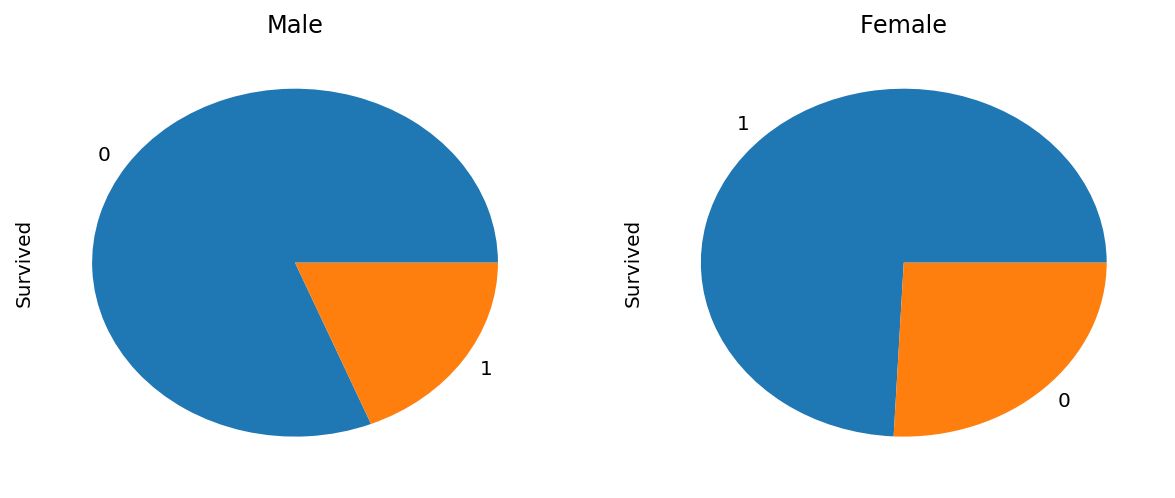

In [11]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.title('Male')
data.Survived[data['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
plt.title('Female')
data.Survived[data['Sex'] == 'female'].value_counts().plot(kind='pie') #More proportion of females that survived, more proportion of males that did not survive

### Survival vs Gender vs Embarked

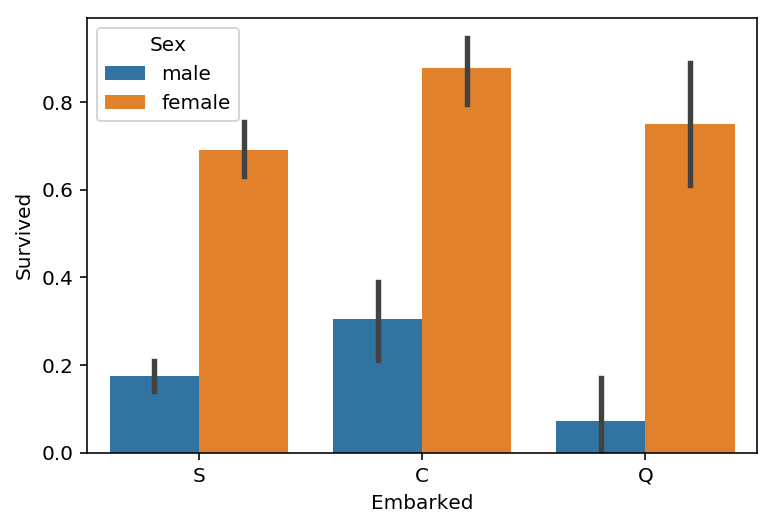

In [12]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data); #Females more likely to survive, 'C' is best for survival

### Survival vs Gender vs Pclass

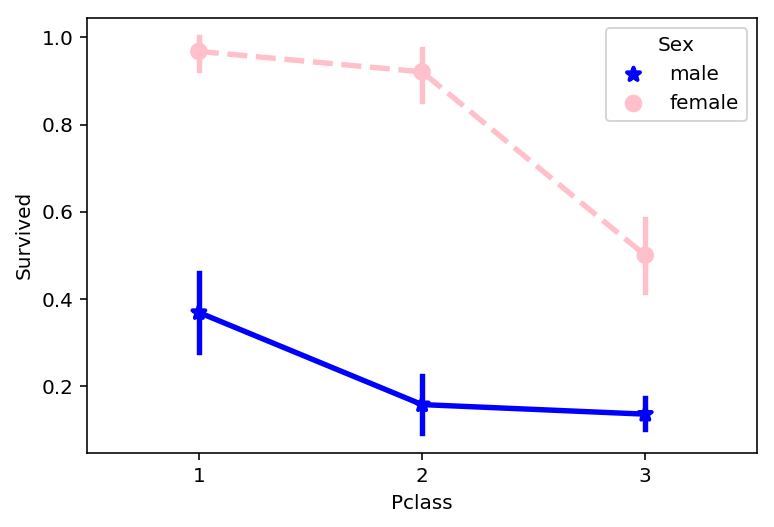

In [13]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]); #Pclass of 1 has the highest survival rates, while 3 has lowest survival

### Survival vs Parch

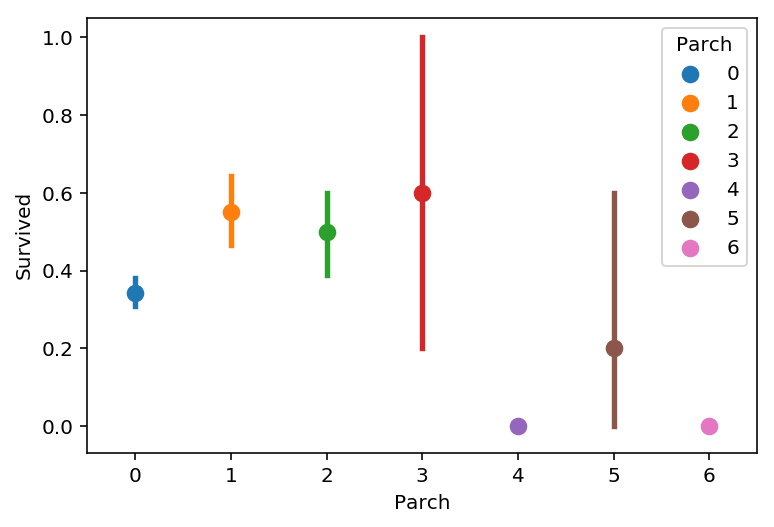

In [14]:
sns.pointplot(x="Parch", y="Survived", hue="Parch", data=data); #Parch < 4 has higher chance of survival

### Survival vs SibSp

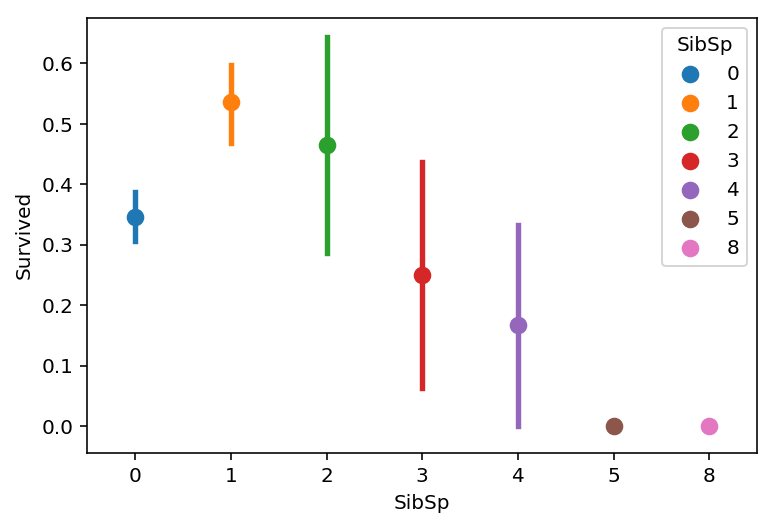

In [15]:
sns.pointplot(x="SibSp", y="Survived", hue="SibSp", data=data); #SibSp < 4 has higher chance of survival

### Survival vs Age

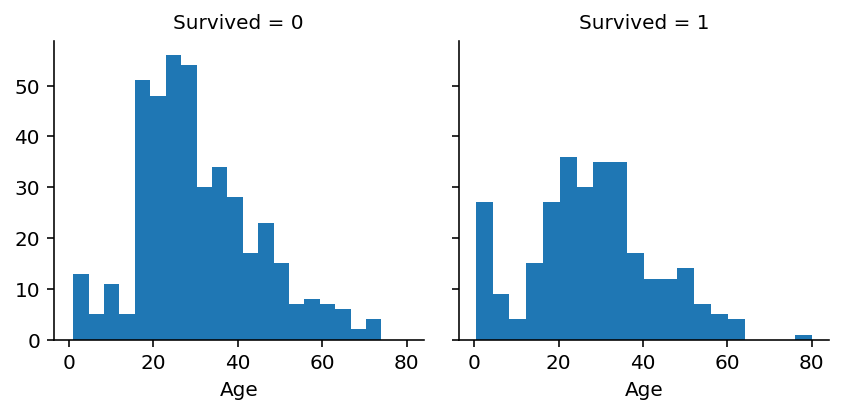

In [16]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20) # Certain age groups died more often i.e 20-30y/o. Need to break down to a few age groups: babies, young adults, adults, senior citizens

# 2.2 Statistical examination
Next, we examine the statistical features for early insights of the data

In [17]:
data.describe() #Only numerical features displayed

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here, we find some interesting observations:

a) The count tells us that many features have missing inputs, e.g. age has a missing 177 inputs. <br>
b) The feature 'Fare' has huge variance, with the difference between the top 25% and the rest of the percentiles being multiples times. 

In [18]:
data.describe(include=['O']) #Only categorical features displayed. 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carrau, Mr. Francisco M",male,347082,G6,S
freq,1,577,7,4,644


Here we find there are too many unique values for

a) Name <br>
b) Ticket <br>
c) Cabin <br>

These features have to be organised into smaller and more useful categories within itself to prevent overfitting, or dropped if they are unimportant.

In [19]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


We find missing values for Age, Cabin and Embarked. These will have to be filled up in Section 3.

## Section 2.3: Concluding Remarks for Data Visualisation

### a) Completing

<b>Fill up the missing values for Age feature </b> as it seems correlated to survival (Section 2.1). <br>
<b>Fill up the Embarked feature </b> as it seems correlated to survival (Section 2.1). <br>

### b) Correlating

We want to know how well does each feature correlate with Survival in order to decide which features to retain. <b>We need to convert non-numerical features to numerical features. </b>

() Not sure if One-hot encoding would be better or just listing them as ordinal variables as I did

### c) Correcting

At first glance, these features seem unimportant intuitively and for ease of feature engineering, should be dropped to prevent overfitting. <br>
- Ticket feature gives too many unique values. <br>
- Cabin feature contains too many NULL and Unique values. <br>
- PassengerId is a unique value for each entry. Appear to be more for being a unique identifier for each tuple. <br>
- Name feature gives a unique value for each entry too, serving more as an identifier. Perhaps extracting the Prefixes (Mr, Miss) might help, but that is already covered in Sex.  <br>

() Didn't look at the data carefully enough, but Name feature actually contains useful features such as Dr, Sir, Master that can help in prediction. This is an area for improvement. <br></br>
() Cabin was interpreted wrongly. Not every passenger on board the ship was meant to have a cabin, so I could have segregated it into a passenger with a cabin or not. This is an area for improvement.

### d) Creating

Since the 2 features of Parch and SibSp are quite highly correlated at 0.55, we should <b>combine them into a new feature called Family. </b><br>
We should <b>categorise Age so it overfits less. </b> This turns a continous numerical feature into an ordinal categorical feature. <br>
We should <b>categorise Fare as a range </b> for similar reasons as categorising Age. <br>

Concluding our preliminary data visualisation, we shall now proceed to feature engineering based on these insights.

() Could have normalised Age and Fare rather than categorising it too. Might have made a difference.

## 3. Feature Engineering
<hr>

### 3.1 Drop unnecessary features

In [20]:
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')
combine = [train_data, test_data] # Merge test data too so feature engineering applies to both datasets, making testing easier later on

print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

train_data = train_data.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin', 'Name'], axis=1) # PassengerID necessary for later identification
combine = [train_data, test_data]

print("After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

print (test_data.info()) #Missing Age and Fare values in Test Set

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 8) (418, 8) (891, 8) (418, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB
None


### 3.2 Completing NULL Values

In [21]:
for dataset in combine: #included test set in calculating the mean to get the most representative age values to input
    age_avg  = dataset['Age'].mean()
    age_std  = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
freq_port = train_data.Embarked.dropna().mode()[0] #Most frequent occurence of Embarked
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port) #Fill in with it

test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True) #Fill fare with median value, only 1 value to fill so not too sophisticated

print (train_data.info()) #No more NULL Values!
print (test_data.info()) #No more NULL Values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 26.2+ KB
None


/Users/junyean/miniconda3/envs/CE9010_2018_light/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### 3.3 Correlating Non-numerical to numerical features

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head() #All Features converted to numbers!

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


At this stage, all features are numerical as seen in the table above. Now we proceed to combining and refining our existing features

### 3.4 Creating New Data Features

### 3.4.1 Creating Family from Parch and SibSp

In [23]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 #Include yourself as everyone belongs to a family, min FamilySize is 1

for dataset in combine:    #break into 3 groups
    dataset.loc[ dataset['FamilySize'] <= 1, 'FamilySize'] = 0 #No Family
    dataset.loc[(dataset['FamilySize'] > 1) & (dataset['FamilySize'] <= 4), 'FamilySize'] = 1 #Small Family
    dataset.loc[(dataset['FamilySize'] > 4), 'FamilySize'] = 2 #Large Family
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,1
2,1,3,1,26,0,0,7.9250,0,0
3,1,1,1,35,1,0,53.1000,0,1
4,0,3,0,35,0,0,8.0500,0,0


Following which, we drop the SibSp and Parch features since they have already been embedded in FamilySize

In [24]:
train_data = train_data.drop(['Parch', 'SibSp'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp'], axis=1)
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22,7.2500,0,1
1,1,1,1,38,71.2833,1,1
2,1,3,1,26,7.9250,0,0
3,1,1,1,35,53.1000,0,1
4,0,3,0,35,8.0500,0,0


### 3.4.2 Creating Categories from Age

We repeat this with Age. We break Age down into 5 groups.

In [25]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 5, 'Age'] = 0 #baby
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 12), 'Age'] = 1 #child
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 16), 'Age'] = 2 #Teen
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 30), 'Age'] = 3 #Young adult
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 65), 'Age'] = 4 #Adult
    dataset.loc[ dataset['Age'] > 65, 'Age'] = 5 #Senior Citizen

combine = [train_data, test_data]
train_data.head() 

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,3,7.2500,0,1
1,1,1,1,4,71.2833,1,1
2,1,3,1,3,7.9250,0,0
3,1,1,1,4,53.1000,0,1
4,0,3,0,4,8.0500,0,0


In [26]:
train_data[['Age', 'Survived']].groupby(['Age'], as_index=False).mean() 

,Age,Survived
0,0,0.704545
1,1,0.360000
2,2,0.377778
3,3,0.337596
4,4,0.402116
5,5,0.125000


() Perhaps these categories of Age can be further refined.

### 3.4.3 Creating Categories from Fare

Likewise, we break Fare into 4 categories based on the statistical quartile we found in Section 2.2.

In [27]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0 #Cheapest
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1 #2nd Cheapest
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2 #2nd Expensive
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3 #Most Expensive
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean() 

,Fare,Survived
0,0,0.197309
1,1,0.308756
2,2,0.445415
3,3,0.581081


In [28]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,3,0,0,1
1,1,1,1,4,3,1,1
2,1,3,1,3,1,0,0
3,1,1,1,4,3,0,1
4,0,3,0,4,1,0,0


Now, we see a very clean dataset. Let us see the correlation now. 

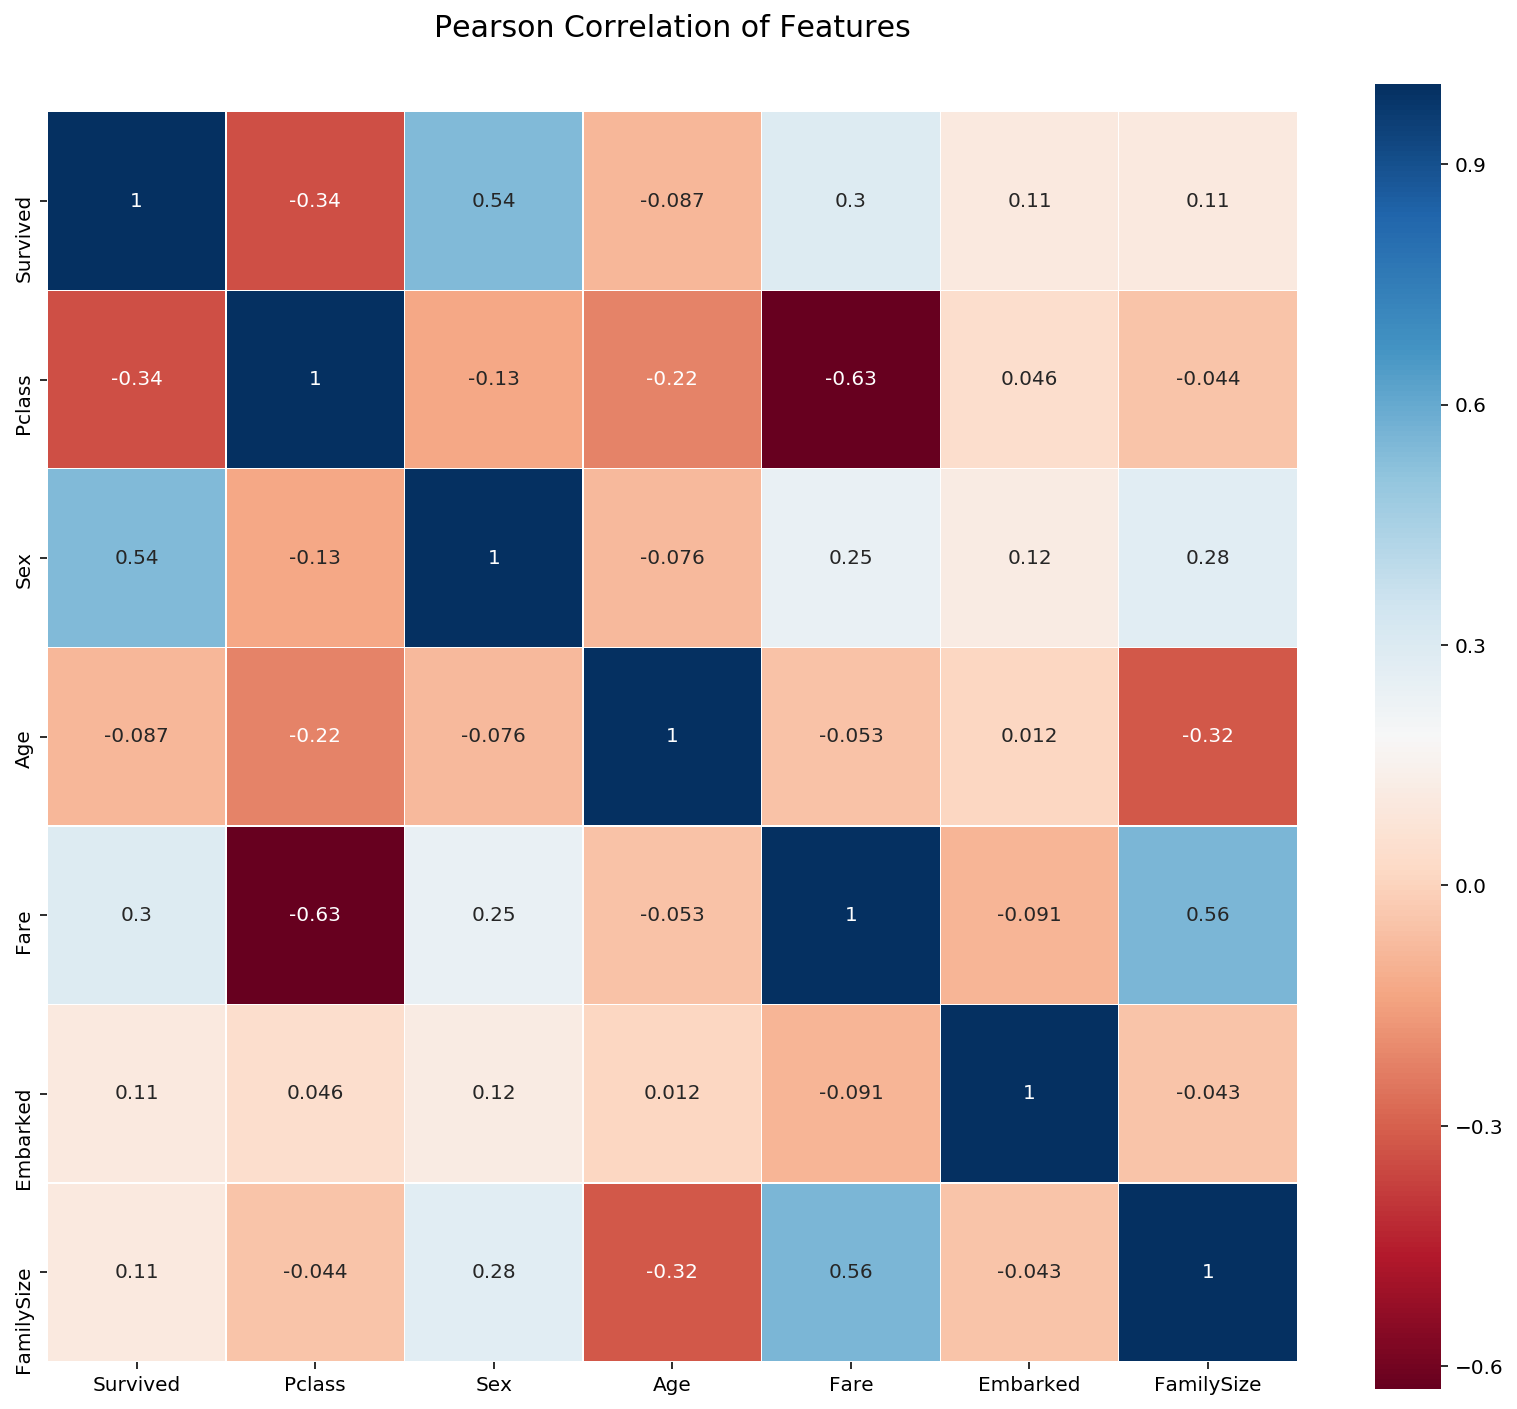

In [29]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

At first glance, there are no redundant features that are obviously uncorrelated. Interestingly, being a woman increases your chance of survival by a lot. Therefore, we shall stick with these features for prediction. The next step is to find a prediction algorithm.

() Might need to learn a more sophisticated way of feature selection. Still not sure what is a good feature or bad feature beyond intuition. (Resolved through RFE below.)

Optimal number of features: 6
Selected features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']


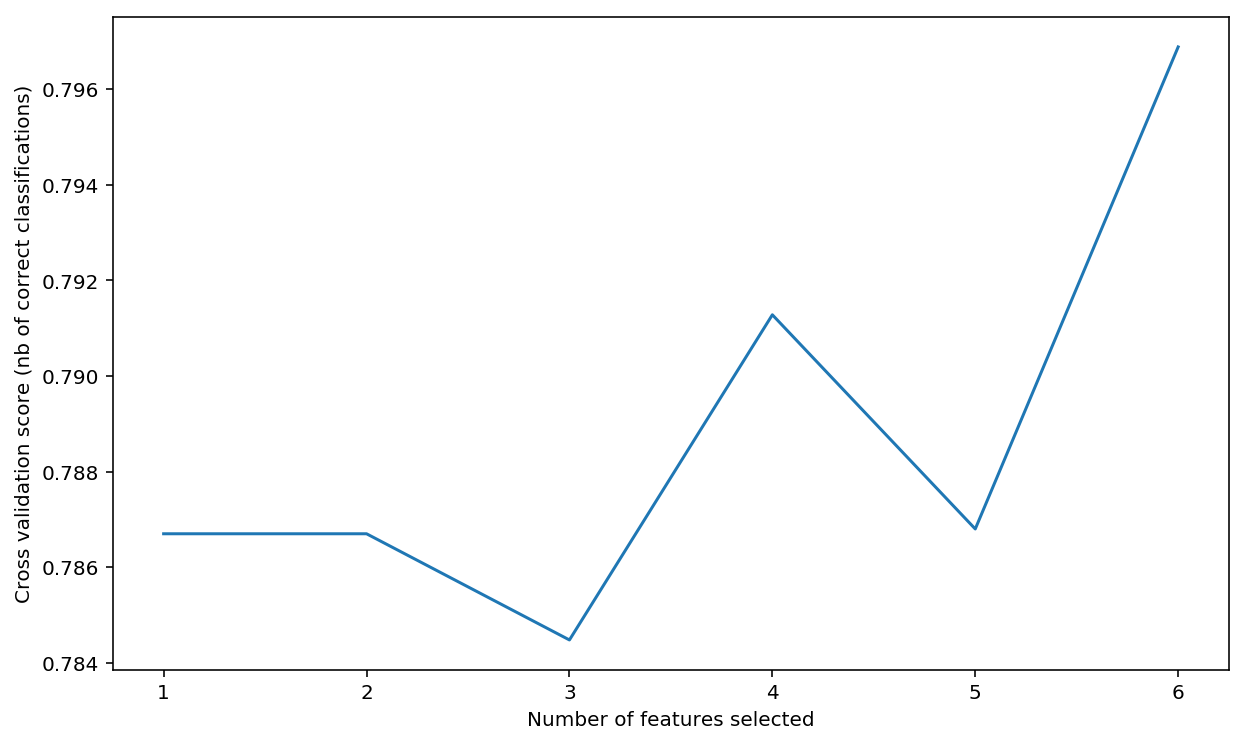

In [30]:
## For fun, I copied RFE code from https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFECV

X_all = train_data.drop(['Survived'], axis=1)
y_all = train_data['Survived']

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_all, y_all)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_all.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show() 

In [44]:
# calculate null accuracy (for multi-class classification problems)
max(y_all.mean(), 1 - y_all.mean())

0.6161616161616161

A dumb algorithm that only predicts 1s or 0s can score 0.616 accuracy on our training data. Our algorithm should perform better than this.

## 4. Logistic Regression
<hr>

Our algorithm choice to solve this is a classifier to predict survival (0 or 1) based on 6 selected features as seen in Section 3. We have learnt Logistic Regression (supervised classification) which is appropriate for our purposes. These algorithms will be judged on their classification accuracy since it is a classification problem.

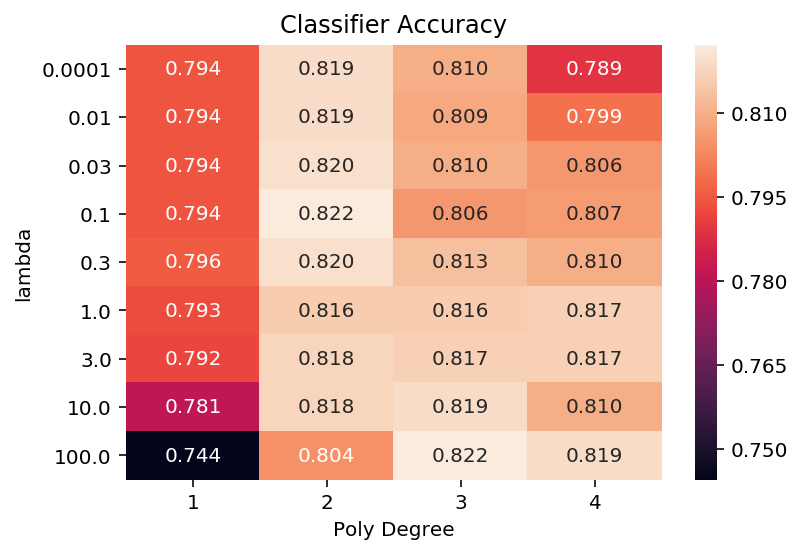

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

n_splits = 10
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.1, random_state=0)

X = train_data.values[0::, 1::]
y = train_data.values[0::, 0]

log_cols = ["lambda", "Poly Degree", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    for lambd in [0.0001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100]:
        for poly_degree in range(1,5):
            
            # Create polynomial features
            poly = PolynomialFeatures(poly_degree)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)

            clf = LogisticRegression(C=1/lambd)        
            clf.fit(X_train_poly, y_train)
            train_predictions = clf.predict(X_test_poly)
            acc = accuracy_score(y_test, train_predictions)
            
            if lambd in acc_dict:
                if poly_degree in acc_dict[lambd]:
                    acc_dict[lambd][poly_degree] += acc #add total accuracy
                else:
                    acc_dict[lambd][poly_degree] = acc
            else:
                acc_dict[lambd] = {}
                acc_dict[lambd][poly_degree] = acc


for lambd in acc_dict:
    for poly_degree in acc_dict[lambd]:
        acc_value = acc_dict[lambd][poly_degree] / n_splits #get average accuracy for each combination of lambda and poly
        log_entry = pd.DataFrame([[lambd, poly_degree, acc_value]], columns=log_cols)
        log = log.append(log_entry)

plt.figure()

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

heatmap_data = log.pivot("lambda", "Poly Degree", "Accuracy")
ax = sns.heatmap(heatmap_data, annot=True, fmt='.3f')

From the 10-fold cross validation as seen in the chart above, we find that a Polynomial Degree of 2 and a lambda of 1 is optimal. This is hyper-parameter tuning based on k-fold cross validation.

In [ ]:
# Use candidate classifier
lambd = 1
poly_degree = 2
candidate_classifier = LogisticRegression(C=1/lambd)

# Create polynomial features
X = train_data.values[0::, 1::]
y = train_data.values[0::, 0]
poly = PolynomialFeatures(poly_degree)
X_train_poly = poly.fit_transform(X)
X_test_poly = poly.fit_transform(test_data.values[0::, 1::])

candidate_classifier.fit(X_train_poly, y)
surv_pred = candidate_classifier.predict(X_test_poly)

submit = pd.DataFrame({'PassengerId' : test_data['PassengerId'],
                       'Survived': surv_pred.T})
submit.to_csv("data/submit_logistic_poly.csv", index=False)

In [ ]:
print(submit)

Unfortunately, this submission using Logistic Regression only gives us a Kaggle ranking of 8177/11007, which is bad. Perhaps there are better algorithms for us to use. Let's evaluate our performance through a Confusion Matrix using a train-test split

![alt text](img/LogRegScore.png)

In [33]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# Use candidate classifier
lambd = 1
poly_degree = 2
candidate_classifier = LogisticRegression(C=1/lambd)

# Create polynomial features
# create X (features) and y (response)
X = train_data.values[0::, 1::]
y = train_data.values[0::, 0]

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
poly = PolynomialFeatures(poly_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

candidate_classifier.fit(X_train_poly, y_train)
y_pred = candidate_classifier.predict(X_test_poly)

target_names = ['Did not Survive', 'Survive']
print(classification_report(y_test, y_pred, target_names=target_names))
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[0, 1]))

                 precision    recall  f1-score   support

Did not Survive       0.74      0.93      0.83       100
        Survive       0.87      0.59      0.71        79

    avg / total       0.80      0.78      0.77       179



,0,1
0,93,7
1,32,47


f1-score is 0.77, pretty low . The false classification of survivers as non-survivors is especially bad. Let us examine another algorithm.

## 5. Trying Other Algorithms: Random Forest
<hr>


In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

Y_pred = random_forest.predict(X_test)

target_names = ['Did not Survive', 'Survive']
print(classification_report(y_test, Y_pred, target_names=target_names))
pd.DataFrame(confusion_matrix(y_test, Y_pred, labels=[0, 1]))

86.66
                 precision    recall  f1-score   support

Did not Survive       0.76      0.89      0.82       100
        Survive       0.82      0.65      0.72        79

    avg / total       0.79      0.78      0.78       179



,0,1
0,89,11
1,28,51


In [36]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X, y)

Y_pred = random_forest.predict(test_data.values[0::, 1::])

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('data/RFsubmission.csv', index=False)

An un-optimised Random Forest gives us an improvement by 0.1, which ranks us ~2000 places higher! 

![alt text](img/RFScore.png)

But perhaps the model was overfitted with 100 decision trees. Next, let us optimise this Random Forest with some different parameter combinations.

In [38]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestClassifier()

n_estimators = [3,6,9,12,15]
max_features = [0.1,0.25,0.5,0.75,0.99]
max_depth = [3,6,9,12,15]

gsf = GridSearchCV(forest, {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth':max_depth}, cv=5)
gsf.fit(X_train, y_train)
gsf.best_params_

y_pred = gsf.best_estimator_.predict(X_test)

print(accuracy_score(y_test, y_pred))

print(gsf.best_params_)

0.7486033519553073
{'max_depth': 6, 'max_features': 0.1, 'n_estimators': 6}


Based on the output of the above cell, input it into the one below. This varies at each run however.

In [39]:
random_forest = RandomForestClassifier(n_estimators=9, max_features=0.5, max_depth=3)

from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.6444444444444445
Fold 2 accuracy: 0.6853932584269663
Fold 3 accuracy: 0.7415730337078652
Fold 4 accuracy: 0.7078651685393258
Fold 5 accuracy: 0.7191011235955056
Fold 6 accuracy: 0.7528089887640449
Fold 7 accuracy: 0.7528089887640449
Fold 8 accuracy: 0.7640449438202247
Fold 9 accuracy: 0.7865168539325843
Fold 10 accuracy: 0.797752808988764
Mean Accuracy: 0.735230961298377


/Users/junyean/miniconda3/envs/CE9010_2018_light/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
random_forest.fit(X, y)

Y_pred = random_forest.predict(test_data.values[0::, 1::])

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('data/RFNewsubmission.csv', index=False)

Guess what? This optimisation led to another massive improvement in our algorithm's performance. On Kaggle, our rank increasd by ~3000 places!

![alt text](img/RFNew.png)

However, our algorithm is definitely not optimised. Our mean accuracy is very low, much lower than expected. This is due to a lack of experience and knowledge in choosing the optimal parameters.

### [Bonus] Trying Other Algorithms: Neural Networks

Following Week 12's lecture on NN, I was inspired to try it. Although NN are for large datasets with many features, let us try it here for learning purposes. We shall input the raw data since NN will do the feature engineering for us. The framework of the code is derived from https://www.kaggle.com/liyenhsu/titanic-neural-network

In [42]:
import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X, y, batch_size = 32, epochs = 200)

/Users/junyean/miniconda3/envs/CE9010_2018_light/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/200
891/891 [==============================] - 0s 386us/step - loss: 0.6918 - acc: 0.6027
Epoch 2/200
891/891 [==============================] - 0s 161us/step - loss: 0.6891 - acc: 0.6162
Epoch 3/200
891/891 [==============================] - 0s 165us/step - loss: 0.6858 - acc: 0.6162
Epoch 4/200
891/891 [==============================] - 0s 163us/step - loss: 0.6798 - acc: 0.6162
Epoch 5/200
891/891 [==============================] - 0s 152us/step - loss: 0.6691 - acc: 0.6162
Epoch 6/200
891/891 [==============================] - 0s 160us/step - loss: 0.6517 - acc: 0.6162
Epoch 7/200
891/891 [==============================] - 0s 153us/step - loss: 0.6265 - acc: 0.6162
Epoch 8/200
891/891 [==============================] - 0s 166us/step - loss: 0.5978 - acc: 0.6162
Epoch 9/200
891/891 [==============================] - 0s 172us/step - loss: 0.5723 - acc: 0.6936
Epoch 10/200
891/891 [==============================] - 0s 178us/step - loss: 0.5499 - acc: 0.7419
Epoch 11/200
891/89

891/891 [==============================] - 0s 153us/step - loss: 0.4350 - acc: 0.8036
Epoch 84/200
891/891 [==============================] - 0s 158us/step - loss: 0.4359 - acc: 0.8047
Epoch 85/200
891/891 [==============================] - 0s 169us/step - loss: 0.4349 - acc: 0.8070
Epoch 86/200
891/891 [==============================] - 0s 150us/step - loss: 0.4354 - acc: 0.8126
Epoch 87/200
891/891 [==============================] - 0s 167us/step - loss: 0.4349 - acc: 0.8081
Epoch 88/200
891/891 [==============================] - 0s 157us/step - loss: 0.4342 - acc: 0.8092
Epoch 89/200
891/891 [==============================] - 0s 172us/step - loss: 0.4343 - acc: 0.8092
Epoch 90/200
891/891 [==============================] - 0s 166us/step - loss: 0.4341 - acc: 0.8002
Epoch 91/200
891/891 [==============================] - 0s 168us/step - loss: 0.4334 - acc: 0.8058
Epoch 92/200
891/891 [==============================] - 0s 164us/step - loss: 0.4336 - acc: 0.8148
Epoch 93/200
891/891 [=

891/891 [==============================] - 0s 176us/step - loss: 0.4228 - acc: 0.8114
Epoch 166/200
891/891 [==============================] - 0s 180us/step - loss: 0.4228 - acc: 0.8148
Epoch 167/200
891/891 [==============================] - 0s 170us/step - loss: 0.4236 - acc: 0.8070
Epoch 168/200
891/891 [==============================] - 0s 170us/step - loss: 0.4239 - acc: 0.8148
Epoch 169/200
891/891 [==============================] - 0s 168us/step - loss: 0.4238 - acc: 0.8126
Epoch 170/200
891/891 [==============================] - 0s 163us/step - loss: 0.4243 - acc: 0.8126
Epoch 171/200
891/891 [==============================] - 0s 168us/step - loss: 0.4221 - acc: 0.8148
Epoch 172/200
891/891 [==============================] - 0s 207us/step - loss: 0.4219 - acc: 0.8171
Epoch 173/200
891/891 [==============================] - 0s 189us/step - loss: 0.4228 - acc: 0.8126
Epoch 174/200
891/891 [==============================] - 0s 162us/step - loss: 0.4228 - acc: 0.8081
Epoch 175/200


In [43]:
y_pred = model.predict(test_data.values[0::, 1::])
y_final = (y_pred > 0.5).astype(int).reshape(test_data.shape[0])

output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_final})
output.to_csv('prediction-ann.csv', index=False)

The score of this NN however gave us a poorer Kaggle score than the Random Forest. This could be due to the small dataset provided by Kaggle that may limit the predictive utility of a NN. Performance could also improve if we tune the various hyper-parameters (which we did not do here).

## 6. Conclusion

In this Kaggle project, we analysed 12 predictors of survival on board the Titanic. From our preliminary correlations, we saw that 1) a female was more likely to survive the disaster, 2) a higher fare or passenger class warranted greater chances of survival, 3) kids were more likely to survive. 

We then tried 2 classifiers, namely Logistic Regression and Random Forest, in order to accurately predict survival given a set of features. Due to the small amount of training data (<1k), as well as inexperience in feature engineering, our model's predictive accuracy were not high. 

In hindsight, these aspects of our project could have been improved upon:

### Feature Engineering
- Handling a skewed dataset in some of the features
- Not dropping Name, Cabin, Ticket features because they can have some useful predictive utility
- Better understanding the context of these features e.g. visualing the cabins from [here](https://www.kaggle.com/c/titanic/discussion/4693#25690)  
- Understanding where the false positives and false negatives come from for these classifiers i.e perhaps a certain feature accounted for most of the false predictions
- Maybe I should not have combined features such as Parch and SibSp -> Family because I might have lost critical information. E.g. If parent survived child also survived.

### Algorithm Selection
- Better understanding k-fold cross validation and having a better feel for the ideal range for parameters to optimise i.e (what is an ideal range for lambda in logistic regression?)
- Better understanding random forests because it has a lot of potential in predicting this problem. We only implemented the most basic version of it.
- Neural Networks could have performed better in a problem with a larger dataset.

## 7. References
<hr>

This notebook has been created based on great work done solving the Titanic competition and other sources.

https://www.kaggle.com/startupsci/titanic-data-science-solutions <br>
https://www.kaggle.com/sinakhorami/titanic-best-working-classifier?scriptVersionId=566580 <br>
https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python <br>
https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial <br>
https://github.com/ahmedbesbes/How-to-score-0.8134-in-Titanic-Kaggle-Challenge/blob/master/article_1.ipynb <br>
https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish/notebook <br>
http://www.ritchieng.com/machine-learning-cross-validation/ <br>
https://www.kaggle.com/ankitagarwal/logistic-regression-with-k-fold <br>
https://github.com/grimreaper94/MyProjects/blob/master/Titanic%20Neural%20Network(Tensorflow%2CKeras).ipynb <br>